In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dat = pd.read_csv('train.csv')
tset = pd.read_csv('test.csv')

In [8]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


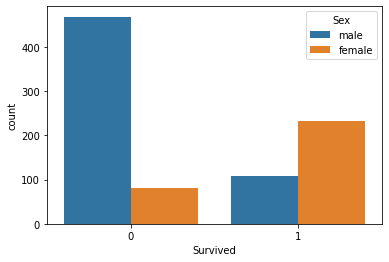

In [9]:
sns.countplot(x='Survived',data=dat,hue='Sex').get_figure().savefig('Survived_hue_Sex.png')

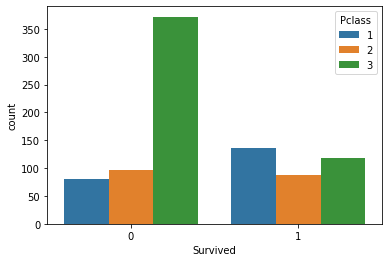

In [10]:
sns.countplot(x='Survived',data=dat,hue='Pclass').get_figure().savefig('Survived_hue_Class.png')

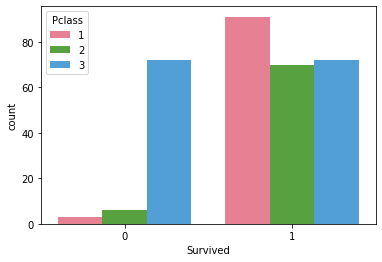

In [11]:
sns.countplot(x='Survived',data=dat[dat['Sex'] == 'female'],hue='Pclass',palette='husl').get_figure().savefig('Survived_Females_hue_Class.png')

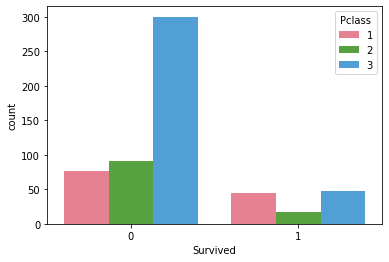

In [12]:
sns.countplot(x='Survived',data=dat[dat['Sex'] == 'male'],hue='Pclass',palette='husl').get_figure().savefig('Survived_Males_hue_Class.png')

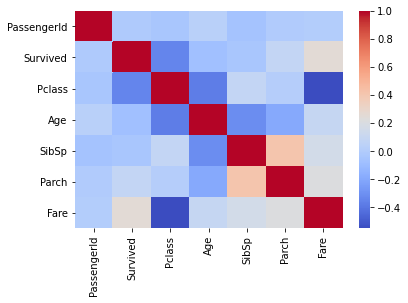

In [13]:
sns.heatmap(dat.corr(),cmap='coolwarm').get_figure().savefig('Features_Correlation_Map.png')

In [14]:
#Survival rate of 1st class females
temp = dat[(dat['Pclass'] == 1)]
round(100*temp[temp['Survived'] == 1].shape[0]/temp.shape[0], 2)

62.96

In [27]:
#Survival rate of 1st class females
temp = dat[(dat['Sex'] == 'female') & (dat['Pclass'] == 1)]
round(100*temp[temp['Survived'] == 1].shape[0]/temp.shape[0], 2)

96.81

In [28]:
#Survival rate of 3rd class females
temp = dat[(dat['Sex'] == 'female') & (dat['Pclass'] == 3)]
round(100*temp[temp['Survived'] == 1].shape[0]/temp.shape[0], 2)

50.0

In [29]:
#Survival rate of 1st class males
temp = dat[(dat['Sex'] == 'male') & (dat['Pclass'] == 1)]
round(100*temp[temp['Survived'] == 1].shape[0]/temp.shape[0], 2)

36.89

In [30]:
#Survival rate of 3rd class males
temp = dat[(dat['Sex'] == 'male') & (dat['Pclass'] == 3)]
round(100*temp[temp['Survived'] == 1].shape[0]/temp.shape[0], 2)

13.54

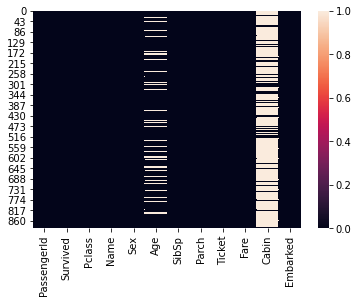

In [99]:
sns.heatmap(dat.isna())

In [100]:
dat['Embarked'].fillna('C',inplace=True)

In [101]:
dat.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [102]:
passId = tset['PassengerId']
allDrops = ['PassengerId','Cabin','Ticket','Name','Parch','SibSp'] 
dat.drop(allDrops,axis=1,inplace=True)
tset.drop(allDrops,axis=1,inplace=True)

In [103]:
print(dat.shape)
print(tset.shape)

(891, 6)
(418, 5)


In [104]:
dat['Sex'] = [1 if sex=='male' else 0 for sex in dat['Sex']]
tset['Sex'] = [1 if sex=='male' else 0 for sex in tset['Sex']]


dat

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C
2,1,3,0,26.0,7.9250,S
3,1,1,0,35.0,53.1000,S
4,0,3,1,35.0,8.0500,S
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,S
887,1,1,0,19.0,30.0000,S
888,0,3,0,NaN,23.4500,S
889,1,1,1,26.0,30.0000,C


In [105]:
mp = {}
mp[1] = dat[dat['Pclass'] == 1]['Fare'].mean()
mp[2] = dat[dat['Pclass'] == 2]['Fare'].mean()
mp[3] = dat[dat['Pclass'] == 3]['Fare'].mean()

dat['Age'] = [mp[dat['Pclass'][i]] if np.isnan(dat['Age'][i]) else dat['Age'][i] for i in range(dat.shape[0])]
tset['Age'] = [mp[tset['Pclass'][i]] if np.isnan(tset['Age'][i]) else tset['Age'][i] for i in range(tset.shape[0])]

dat['S'] = [1 if i == 'S' else 0 for i in dat['Embarked']]
dat['C'] = [1 if i == 'C' else 0 for i in dat['Embarked']]
tset['S'] = [1 if i == 'S' else 0 for i in tset['Embarked']]
tset['C'] = [1 if i == 'C' else 0 for i in tset['Embarked']]

dat['class1'] = [1 if i == 1 else 0 for i in dat['Pclass']]
dat['class2'] = [1 if i == 2 else 0 for i in dat['Pclass']]
tset['class1'] = [1 if i == 1 else 0 for i in tset['Pclass']]
tset['class2'] = [1 if i == 2 else 0 for i in tset['Pclass']]


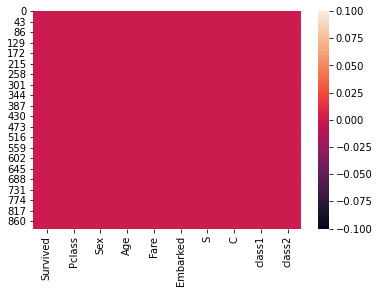

In [106]:
dat.dropna(inplace=True)
sns.heatmap(dat.isnull())

In [107]:
allDrops = ['Embarked','Pclass'] 
dat.drop(allDrops,axis=1,inplace=True)
tset.drop(allDrops,axis=1,inplace=True)
print(tset['Fare'].isna().sum())
tset['Fare'][152] = 13
dat

1


/home/gaurav/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Survived,Sex,Age,Fare,S,C,class1,class2
0,0,1,22.00000,7.2500,1,0,0,0
1,1,0,38.00000,71.2833,0,1,1,0
2,1,0,26.00000,7.9250,1,0,0,0
3,1,0,35.00000,53.1000,1,0,1,0
4,0,1,35.00000,8.0500,1,0,0,0
...,...,...,...,...,...,...,...,...
886,0,1,27.00000,13.0000,1,0,0,1
887,1,0,19.00000,30.0000,1,0,1,0
888,0,0,13.67555,23.4500,1,0,0,0
889,1,1,26.00000,30.0000,0,1,1,0


In [108]:
from sklearn.linear_model  import  LogisticRegression
from sklearn.svm  import  SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [109]:
#lr = SVC()
lr = LogisticRegression()
#lr = RandomForestClassifier(n_estimators=10)

lr.fit(dat.drop('Survived',axis=1), dat['Survived'])

/home/gaurav/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [110]:
pred = lr.predict(tset)

In [111]:
pred = pd.DataFrame(pred)
passId = pd.DataFrame(passId)
passId['Survived'] = pred

In [112]:
passId.to_csv('pred3.csv',index = False)

In [113]:
passId

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
tset

,Sex,Age,Fare,S,C,class1,class2
0,1,34.50000,7.8292,0,0,0,0
1,0,47.00000,7.0000,1,0,0,0
2,1,62.00000,9.6875,0,0,0,1
3,1,27.00000,8.6625,1,0,0,0
4,0,22.00000,12.2875,1,0,0,0
...,...,...,...,...,...,...,...
413,1,13.67555,8.0500,1,0,0,0
414,0,39.00000,108.9000,0,1,1,0
415,1,38.50000,7.2500,1,0,0,0
416,1,13.67555,8.0500,1,0,0,0
